In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Housing.csv")

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
mean_area=dataset["area"].mean()
print("mean of area of houses ",mean_area)
mean_price=dataset["price"].mean()
print("mean of price ",mean_price)


mean of area of houses  5150.54128440367
mean of price  4766729.247706422


In [7]:
# computing mathematical values
x=dataset["area"]
y=dataset["price"]

mean_x=mean_area
mean_y=mean_price

num= ((x-mean_x)*(y-mean_y)).sum()
den=((x-mean_x)**2).sum()
slope=num/den
print(slope)

# for every 1sq feet increase price increases with 461.9748

461.9748942727835


In [8]:
# line becomes y=461.97x+c
# find the intercept

# c=y_mean − m x_mean

intercept=mean_y- slope*mean_x
print(intercept)

2387308.48239643


In [9]:
# line becomes price=461.97×area+2,387,308.48

# Slope ≈ 462 → every extra square foot adds about ₹462 to the price.

# Intercept ≈ 23.9 lakhs → the “base value” the model imagines even when area is zero.

# So the predicted price for each house is:𝑦^=𝑚𝑥+𝑐

x_i=x

y_hat=slope*x_i+intercept
y_hat.head()


0    5.815162e+06
1    6.526604e+06
2    6.988578e+06
3    5.852120e+06
4    5.815162e+06
Name: area, dtype: float64

In [10]:
# Residuals
errors=y-y_hat
errors.head()

0    7.484838e+06
1    5.723396e+06
2    5.261422e+06
3    6.362880e+06
4    5.594838e+06
dtype: float64

In [11]:
# Positive → your line is underestimating the price.
# Negative (you’ll see later) → your line overestimates.

mse = (errors**2).mean()
print(mse)



2488861398180.6567


In [12]:
# perforemence metrix
R_square= 1-((y-y_hat)**2).sum()/((y-mean_y)**2).sum()
print(R_square)

0.2872931546811469


In [13]:
x_mean = x.mean()
x_std = x.std()

x_scaled = (x - x_mean) / x_std


In [14]:
m = 0.0
c = 0.0
alpha = 0.01
epochs = 2000
n = len(x_scaled)
loss_history=[]
for i in range(epochs):
    y_hat = m*x_scaled + c
    error = y - y_hat
    
    dm = (-2/n) * (x_scaled * error).sum()
    dc = (-2/n) * error.sum()
    
    m = m - alpha * dm
    c = c - alpha * dc
    
    mse = (error**2).mean()
    loss_history.append(mse)

    if i % 200 == 0:
        print(f"Iter {i} | m={m:.4f} | c={c:.2f} | MSE={mse:.2e}")


Iter 0 | m=20014.2225 | c=95334.58 | MSE=2.62e+13
Iter 200 | m=985139.9675 | c=4684569.01 | MSE=2.50e+12
Iter 400 | m=1002242.1490 | c=4765284.22 | MSE=2.49e+12
Iter 600 | m=1002545.2024 | c=4766703.83 | MSE=2.49e+12
Iter 800 | m=1002550.5726 | c=4766728.80 | MSE=2.49e+12
Iter 1000 | m=1002550.6677 | c=4766729.24 | MSE=2.49e+12
Iter 1200 | m=1002550.6694 | c=4766729.25 | MSE=2.49e+12
Iter 1400 | m=1002550.6694 | c=4766729.25 | MSE=2.49e+12
Iter 1600 | m=1002550.6694 | c=4766729.25 | MSE=2.49e+12
Iter 1800 | m=1002550.6694 | c=4766729.25 | MSE=2.49e+12


In [15]:
m_real = m / x_std
c_real = c - m_real * x_mean

print("Recovered slope:", m_real)
print("Recovered intercept:", c_real)


Recovered slope: 461.97489427278214
Recovered intercept: 2387308.4823964145


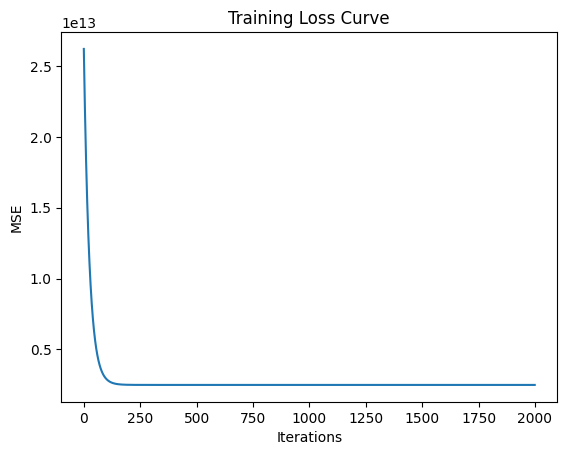

In [16]:
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Training Loss Curve")
plt.show()


In [17]:
y_hat_gd = m_real * x + c_real

# 1. MSE (Mean Squared Error)
mse = ((y - y_hat_gd)**2).mean()
print("MSE:", mse)

# 2. RMSE (Root Mean Squared Error) – in rupees
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# 3. MAE (Mean Absolute Error)
mae = np.abs(y - y_hat_gd).mean()
print("MAE:", mae)

#4. R² Score (Goodness of Fit)
ss_res = ((y - y_hat_gd)**2).sum()
ss_tot = ((y - mean_y)**2).sum()

r2 = 1 - ss_res/ss_tot
print("R²:", r2)


MSE: 2488861398180.6567
RMSE: 1577612.5627607866
MAE: 1172305.5113148885
R²: 0.2872931546811469
